# Visual Diagnostics Example

Minima are often not found to full precision with the updated Voce-Chaboche model calibration, therefore, we would like a way to assess the quality of the fitting.
Some visual tools are provided to help you understand why it is difficult to obtain a minimum to high precision.

In [1]:
import numpy as np
import RESSPyLab as rpl

## Generating Results

We will use parameters calibrated from a previous example, and the associated data. 
One backstress is used in this set of parameters, the indices corresponding to all the parameters are provided below.
Note that in this example we do not look at the elastic modulus and initial yield stress parameters (i.e., parameters `0` and `1`, respectively).

In this example, we will sample a range of +/-10 % from the calibrated parameter values, within this range (total 20 %) we will sample 25 evenly spaced points.
Within the ranges for each of the specified parameters we will keep track of where the Hessian of the objective function is positive definite, and will provide contour plots of the objective function within the specified ranges.

In [2]:
# Load the data
data_files = ['example_1.csv']
data = rpl.load_data_set(data_files)
# Load the parameters from a previous analysis that correspond to the data
# You will have to run the UVC_Calibration_Example_1 Notebook for the logfile to exist
# The final solution point is the last line in the parameter log file
x = np.loadtxt('./output/x_log_upd.txt', delimiter=' ')
x = x[-1]

# Set the parameters to vary and their range
# {2: Q_\infty, 3: b, 4: D_\infty, 5: a, 6: C_1, 7: \gamma_1}
# The following variations indicate +/-10 % from the parameters' starting values
x_variation = {2: [0.90, 1.10], 3: [0.90, 1.10],
               4: [0.90, 1.10], 5: [0.90, 1.10],
               6: [0.90, 1.10], 7: [0.90, 1.10]}
# Name of parameters for plotting purposes
x_labels = {2: r'$Q_\infty$', 3: r'$b$', 4: r'$D_\infty$', 5: r'$a$',
            6: r'$C_1$', 7: r'$\gamma_1$'}
# Number of sample points within each range
num_pts = 25

The next cell calls the function to evaluate everything that we discussed previously.
The execution can take some time depending on the number of tests in the data set, the number of parameters to sample, and the number of points in each sample range.

This function saves the generated plots, and the data used to generate each plot.
Note that only the computed data is saved, you will need to keep track of:
- the parameters chosen to generate the data
- the sample ranges
- the number of sample points (although this can be deduced from the output data)

Checking positive definiteness of the Hessian...
Generating function surfaces...
Finished!


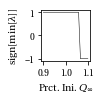

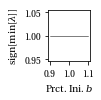

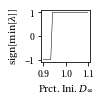

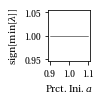

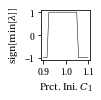

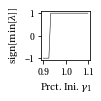

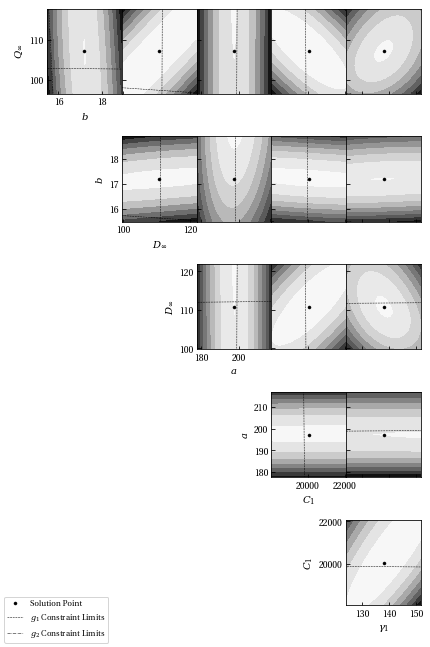

In [3]:
# The parameters correspond to the updated model
# You could specify model_type='Original' and repeat this example if you have parameters from the original model
model_type = 'Updated'
# Directory for the save files
save_dir = './output/vis_saves/'
# Directory for the plots
plot_dir = './output/vis_plots/'
[hessian_pos_def, surfaces] = rpl.solution_visualizations(data, x, x_variation, num_pts, x_labels, model_type, save_dir, plot_dir)

## Interpreting the Results

The sign of the minimum eigenvalue of the Hessian is used to represent if the Hessian is positive definite or not.
If the minimum eigenvalue is positive, then the Hessian is positive definite.
In the contour plot, the lighter colors represent lower values of the objective function. 

Here are a few observations:
- The Hessian is positive definite at the solution point, this indicates that we are in the neighbourhood of a minimum.
- The solution point is bounded by the constraints (the dashed lines in the contour plots), the constraints make it difficult to find a minimum.